# Membuat Library PETase
Pada notebook ini kita akan mengumpulkan sekuen enzim dengan aktifitas seperti PETase.
Daftar PETase diambil dari https://aem.asm.org/content/84/8/e02773-17 dan disimpan di /PETase/PETase_list_dansoetal2018.txt

In [1]:
import pandas as pd
df = pd.read_csv("PETase/PETase_list_dansoetal2018.txt", sep="\t")
df

,Sequence no.,PDB entry no.a,Gene nameb,Organism,Reference
0,1,W0TJ64,Cut190,Saccharomonospora viridis,6
1,2,E9LVI0,cut1,Thermobifida fusca (Thermomonospora fusca),7
2,3,E5BBQ3,cut-2,Thermobifida fusca (Thermomonospora fusca),8
3,4,D1A9G5,Tcur_1278,Thermomonospora curvata,9
4,5,E9LVH7,cut1,Thermobifida alba,10
5,6,H6WX58,NaN,Thermobifida halotolerans,11
6,7,E9LVH9,cut2,Thermobifida celluloysilityca,12
7,8,A0A0K8P6T7,ISF6_4831,Ideonella sakaiensis,13
8,9,G9BY57,NaN,Uncultured bacterium,14


## Mengunduh FASTA dari UNIPROT
Selanjutnya, kita akan mengunduh sekuen dari enzim2 tersebut di uniprot. Kita akan menggunakan BioPython untuk parsing sequence format

In [2]:
import requests as r
from Bio import SeqIO
from io import StringIO
from Bio.SeqRecord import SeqRecord

# FASTA fetcher uniprot
def get_fasta_uniprot(pID):
    baseUrl="http://www.uniprot.org/uniprot/"
    currentUrl=baseUrl+pID+".fasta"
    response = r.post(currentUrl)
    cData=''.join(response.text)
    Seq=StringIO(cData)
    pSeq=SeqIO.parse(Seq,'fasta')
    return pSeq

In [3]:
filename = [] # filename container
for i in df['PDB entry no.a']: # iterate from list Danso et al 2018
    fasta = get_fasta_uniprot(i)
    for x in fasta:
        seqid = x.id+".fasta"
        file = SeqRecord(
            x.seq,
            id=x.id,
            name="",
            description="",
        )
        SeqIO.write(file, 'PETase/'+seqid, "fasta") # write fasta files
    filename.append(seqid)

In [4]:
filename

['tr|W0TJ64|W0TJ64_9PSEU.fasta',
 'tr|E9LVI0|E9LVI0_THEFU.fasta',
 'tr|E5BBQ3|E5BBQ3_THEFU.fasta',
 'tr|D1A9G5|D1A9G5_THECD.fasta',
 'tr|E9LVH7|E9LVH7_9ACTN.fasta',
 'tr|H6WX58|H6WX58_9ACTN.fasta',
 'tr|E9LVH9|E9LVH9_9ACTN.fasta',
 'sp|A0A0K8P6T7|PETH_IDESA.fasta',
 'sp|G9BY57|PETH_UNKP.fasta']

## Alignment dengan T-Coffee

In [5]:
# merge into one large fasta
with open('PETase/large_fasta.fasta', 'w') as w_file:
    for filen in filename:
        with open('PETase/'+filen, 'r') as o_file:
            seq_records = SeqIO.parse(o_file, 'fasta')
            SeqIO.write(seq_records, w_file, 'fasta')

In [6]:
## this is to run tcoffee using from python
#import subprocess
#subprocess.run(['t_coffee', 'PETase/large_fasta.fasta'])

In [7]:
! t_coffee PETase/large_fasta.fasta -output=fasta_aln


PROGRAM: T-COFFEE Version_12.00.7fb08c2 (2018-12-11 09:27:12 - Revision 7fb08c2 - Build 211)
-full_log      	S	[0] 
-genepred_score	S	[0] 	nsd
-run_name      	S	[0] 
-mem_mode      	S	[0] 	mem
-extend        	D	[1] 	1 
-extend_mode   	S	[0] 	very_fast_triplet
-max_n_pair    	D	[0] 	10 
-seq_name_for_quadruplet	S	[0] 	all
-compact       	S	[0] 	default
-clean         	S	[0] 	no
-do_self       	FL	[0] 	0
-do_normalise  	D	[0] 	1000 
-template_file 	S	[0] 
-setenv        	S	[0] 	0
-export        	S	[0] 	0
-template_mode 	S	[0] 
-flip          	D	[0] 	0 
-remove_template_file	D	[0] 	0 
-profile_template_file	S	[0] 
-in            	S	[0] 
-seq           	S	[1] 	PETase/large_fasta.fasta
-aln           	S	[0] 
-method_limits 	S	[0] 
-method        	S	[0] 
-lib           	S	[0] 
-profile       	S	[0] 
-profile1      	S	[0] 
-profile2      	S	[0] 
-pdb           	S	[0] 
-relax_lib     	D	[0] 	1 
-filter_lib    	D	[0] 	0 
-shrink_lib    	D	[0] 	0 
-out_lib       	W_F	[0] 	no
-out_lib_mode  	S	[

In [8]:
from ete3 import PhyloNode, PhyloTree, TreeStyle
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

/home/matinnu/anaconda3/envs/PKM/lib/python3.8/site-packages/ete3-3.1.2-py3.7.egg/ete3/evol/parser/codemlparser.py:221: SyntaxWarning: "is" with a literal. Did you mean "=="?
/home/matinnu/anaconda3/envs/PKM/lib/python3.8/site-packages/ete3-3.1.2-py3.7.egg/ete3/evol/parser/codemlparser.py:221: SyntaxWarning: "is" with a literal. Did you mean "=="?


In [9]:
t = PhyloTree('large_fasta.dnd')
print(t)


      /-sp|A0A0K8P6T7|PETH_IDESA
   /-|
  |   \-sp|G9BY57|PETH_UNKP
  |
  |--tr|D1A9G5|D1A9G5_THECD
  |
  |               /-tr|E5BBQ3|E5BBQ3_THEFU
--|            /-|
  |         /-|   \-tr|E9LVI0|E9LVI0_THEFU
  |        |  |
  |      /-|   \-tr|E9LVH7|E9LVH7_9ACTN
  |     |  |
  |   /-|   \-tr|E9LVH9|E9LVH9_9ACTN
  |  |  |
   \-|   \-tr|H6WX58|H6WX58_9ACTN
     |
      \-tr|W0TJ64|W0TJ64_9PSEU


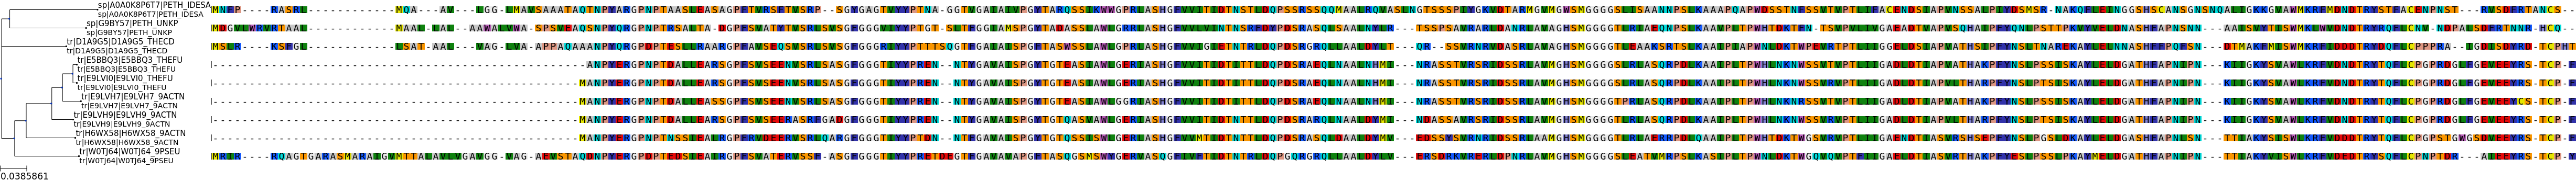

In [10]:
t.link_to_alignment(alignment='large_fasta.fasta_aln', alg_format='fasta')
#t.show(tree_style=TreeStyle())
ts = TreeStyle()
t.render("%%inline", tree_style=ts, dpi=300)